In [2]:
import time
import shutil
import pandas as pd
import numpy as np
from datetime import datetime
from openpyxl import load_workbook
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_columns",None)  # 可以看到全部列
pd.set_option('display.max_rows', None)

In [4]:
import os
print(os.getcwd())  #当前路径

#更改当前路径
os.chdir('D:\\file\\o\\队长\\队长评分\\质量评分迭代\\指标\\')
os.getcwd()

D:\file\o\队长\队长评分\质量评分迭代\指标


'D:\\file\\o\\队长\\队长评分\\质量评分迭代\\指标'

In [ ]:
'''
wb = load_workbook('对比.xlsx')   # excel中设置模板格式
ws = wb['分析']
'''

In [81]:
wb = Workbook('对比.xlsx')   # excel中设置模板格式
ws = wb.create_sheet('分析')
ws_data = wb.create_sheet('data')

## 读数

In [25]:
df1 = pd.read_excel("data.xlsx","1.0data")    
# df2 = pd.read_excel("data.xlsx","2.0data")    
df2 = pd.read_excel("data.xlsx","2.0_2data2")    

In [4]:
df1.shape
df2.shape

(19864, 51)

(18309, 47)

In [6]:
df1.columns

Index(['区域', '城市ID', '城市名称', '业务线', '司机ID', '司机姓名', '司机类型', '司服ID', '司服姓名',
       '小队ID', '小队名称', '队长类型', '滴龄时长', '任职时长', '月会出勤率', '出勤率得分', '任务完成率',
       '完成率得分', '司机部落发言率', '发言率得分', '服务分', '得分个人1', '在线时长', '得分个人2', '有责取消率',
       '得分个人3', 'CPO', '得分个人4', '危险驾驶', '扣分个人1', '小队服务分', '得分小队1', '小队在线时长',
       '得分小队2', '小队有责取消率', '得分小队3', '小队CPO', '得分小队4', '小队危险驾驶', '扣分小队1',
       '队员评分', '得分个人5', '司服评分', '得分个人6', '封禁状态', '总评分', '意愿分', '能力分', '质量类型',
       '质量分类', '队内司机人数'],
      dtype='object')

In [7]:
df2.columns

Index(['大区', '城市群', '城市ID', '城市', '小队业务线', '司机ID', '司机姓名', '司机类型', '滴龄', '队龄',
       '司服ID', '司服姓名', '小队ID', '队名', '小队人数', '队长类型', '封禁类型', '月会出勤率', '出勤得分',
       '部落发言率', '发言得分', '任务完成率', '完成得分', '有效沟通率', '沟通得分', '队长服务分', '服务分得分',
       '队长CPO', 'CPO得分', '峰期时长', '峰期得分', '双非时长', '双非得分', '合规', '合规得分',
       '危险驾驶次数', '危险驾驶扣分', '队员评价', '队员评价得分', '司服评价', '司服评价得分', '最终得分', '分段',
       '队长级别', '司服实际反馈队长级别', '不一致原因（指标占比异议）', '详细描述'],
      dtype='object')

In [32]:
def classify(value):
    if value >= 77.7:
        return 'A'
    elif value >= 56.3:
        return 'B'
    else:
        return 'C'

df2['队长级别'] = df2['最终得分'].apply(lambda x: classify(x))

In [33]:
d2 = df2[['大区', '城市群', '城市ID', '城市', '小队业务线', '司机ID', '司机姓名', '司机类型', '滴龄', '队龄',
       '司服ID', '司服姓名', '小队ID', '队名', '小队人数', '队长类型', '封禁类型', '月会出勤率', '出勤得分',
       '部落发言率', '发言得分', '任务完成率', '完成得分', '有效沟通率', '沟通得分', '队长服务分', '服务分得分',
       '队长CPO', 'CPO得分', '峰期时长', '峰期得分', '双非时长', '双非得分', '合规', '合规得分',
       '危险驾驶次数', '危险驾驶扣分', '队员评价', '队员评价得分', '司服评价', '司服评价得分', '最终得分', '分段',
       '队长级别']].add_suffix('_2')
d1 = df1[['司机ID', '月会出勤率', '出勤率得分', '任务完成率',
       '完成率得分', '司机部落发言率', '发言率得分', '服务分', '得分个人1', '在线时长', '得分个人2', '有责取消率',
       '得分个人3', 'CPO', '得分个人4', '危险驾驶', '扣分个人1', '小队服务分', '得分小队1', '小队在线时长',
       '得分小队2', '小队有责取消率', '得分小队3', '小队CPO', '得分小队4', '小队危险驾驶', '扣分小队1',
       '队员评分', '得分个人5', '司服评分', '得分个人6', '封禁状态', '总评分', '意愿分', '能力分', '质量类型',
       '质量分类', '队内司机人数']].add_suffix('_1')
driver = d2.merge(d1, left_on='司机ID_2', right_on='司机ID_1', how='right')
driver.shape


(19864, 82)

## 类别变化

In [34]:
t0 = driver[['司机ID_2', '司机ID_1', '最终得分_2', '队长级别_2', '总评分_1', '质量分类_1']]
t0.head()

,司机ID_2,司机ID_1,最终得分_2,队长级别_2,总评分_1,质量分类_1
0,562950054861340,562950054861340,92.691877,A,74.39,B
1,562950055010153,562950055010153,79.382509,A,80.50,A
2,562950057218271,562950057218271,43.878747,C,52.44,C
3,562950059887623,562950059887623,75.706605,B,74.83,B
4,562950060467219,562950060467219,72.106976,B,76.00,B


In [35]:
d_rank = {'A':3, 'B':2, 'C':1}
t0['总分变化'] = t0.apply(lambda x: x.get('最终得分_2') - x.get('总评分_1'), axis=1)
t0['分类变化'] = t0.apply(lambda x: d_rank.get(x.get('队长级别_2')) - d_rank.get(x.get('质量分类_1')), axis=1)
t0['分类变化2'] = t0.apply(lambda x: '{}->{}'.format(x.get('质量分类_1'), x.get('队长级别_2')), axis=1)
t0.head()

<ipython-input-35-1849bf25b88f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t0['总分变化'] = t0.apply(lambda x: x.get('最终得分_2') - x.get('总评分_1'), axis=1)
<ipython-input-35-1849bf25b88f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t0['分类变化'] = t0.apply(lambda x: d_rank.get(x.get('队长级别_2')) - d_rank.get(x.get('质量分类_1')), axis=1)
<ipython-input-35-1849bf25b88f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,司机ID_2,司机ID_1,最终得分_2,队长级别_2,总评分_1,质量分类_1,总分变化,分类变化,分类变化2
0,562950054861340,562950054861340,92.691877,A,74.39,B,18.301877,1,B->A
1,562950055010153,562950055010153,79.382509,A,80.50,A,-1.117491,0,A->A
2,562950057218271,562950057218271,43.878747,C,52.44,C,-8.561253,0,C->C
3,562950059887623,562950059887623,75.706605,B,74.83,B,0.876605,0,B->B
4,562950060467219,562950060467219,72.106976,B,76.00,B,-3.893024,0,B->B


In [36]:
class_ch2 = t0['分类变化2'].value_counts()
class_ch2 = pd.DataFrame( {'1.0-->2.0':class_ch2.index.values, 'num': class_ch2.values, 'per': class_ch2.values/class_ch2.cumsum().iloc[-1]} )
class_ch2.set_index(['1.0-->2.0'], drop=True, inplace=True)
class_ch2.sort_index(ascending=True, inplace=True)
class_ch2['per_cum'] = class_ch2['per'].cumsum()
class_ch2[['per', 'per_cum']] = class_ch2[['per', 'per_cum']].applymap(lambda x: format(x, '.2%'))
class_ch2

,num,per,per_cum
1.0-->2.0,,,
A->A,3662,18.44%,18.44%
A->B,2376,11.96%,30.40%
A->C,139,0.70%,31.10%
B->A,2284,11.50%,42.59%
B->B,5346,26.91%,69.51%
B->C,1416,7.13%,76.64%
C->A,191,0.96%,77.60%
C->B,2180,10.97%,88.57%
C->C,2270,11.43%,100.00%


In [90]:
ws.append([])
ws.append(['{0}类别变化{0}'.format('*'*15)])
ws.append([])
for r in dataframe_to_rows(class_ch2, index=True, header=True):
    ws.append(r)

<AxesSubplot:xlabel='1.0-->2.0'>

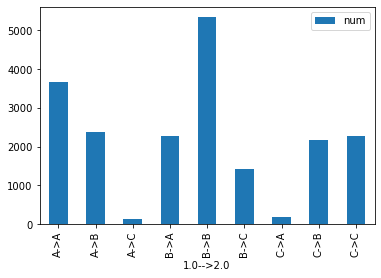

In [37]:
class_ch2.plot.bar()  # align='center'

## 详细变化

In [38]:
t1 = driver[['司机ID_2', '司机ID_1', '月会出勤率_2', '出勤得分_2', '月会出勤率_1', '月会出勤率_1']]
t1.head()

,司机ID_2,司机ID_1,月会出勤率_2,出勤得分_2,月会出勤率_1,月会出勤率_1
0,562950054861340,562950054861340,1.0,10.0,1.0,1.0
1,562950055010153,562950055010153,1.0,10.0,1.0,1.0
2,562950057218271,562950057218271,1.0,10.0,1.0,1.0
3,562950059887623,562950059887623,1.0,10.0,1.0,1.0
4,562950060467219,562950060467219,1.0,10.0,1.0,1.0


In [39]:
driver_raw = driver.copy()   # 原来的driver数据

In [40]:
# 处理1.0指标数据
 # 服务分\CPO\双非时长
driver[['得分个人1_1', '得分个人4_1', '得分个人2_1']] = driver[['得分个人1_1', '得分个人4_1', '得分个人2_1']].apply(lambda x: x*2) 
# 主观分
driver[['得分个人5_1', '得分个人6_1']] = driver[['得分个人5_1', '得分个人6_1']].apply(lambda x: x*0.67)
driver.head()

,大区_2,城市群_2,城市ID_2,城市_2,小队业务线_2,司机ID_2,司机姓名_2,司机类型_2,滴龄_2,队龄_2,司服ID_2,司服姓名_2,小队ID_2,队名_2,小队人数_2,队长类型_2,封禁类型_2,月会出勤率_2,出勤得分_2,部落发言率_2,发言得分_2,任务完成率_2,完成得分_2,有效沟通率_2,沟通得分_2,队长服务分_2,服务分得分_2,队长CPO_2,CPO得分_2,峰期时长_2,峰期得分_2,双非时长_2,双非得分_2,合规_2,合规得分_2,危险驾驶次数_2,危险驾驶扣分_2,队员评价_2,队员评价得分_2,司服评价_2,司服评价得分_2,最终得分_2,分段_2,队长级别_2,司机ID_1,月会出勤率_1,出勤率得分_1,任务完成率_1,完成率得分_1,司机部落发言率_1,发言率得分_1,服务分_1,得分个人1_1,在线时长_1,得分个人2_1,有责取消率_1,得分个人3_1,CPO_1,得分个人4_1,危险驾驶_1,扣分个人1_1,小队服务分_1,得分小队1_1,小队在线时长_1,得分小队2_1,小队有责取消率_1,得分小队3_1,小队CPO_1,得分小队4_1,小队危险驾驶_1,扣分小队1_1,队员评分_1,得分个人5_1,司服评分_1,得分个人6_1,封禁状态_1,总评分_1,意愿分_1,能力分_1,质量类型_1,质量分类_1,队内司机人数_1
0,华北区域,北京城市群,1,北京市,快车,562950054861340,胡子堂,A,2642,609,900032802,吕敬涛,313830,张磊5组-27,51.0,队长,NaN,1.0,10.0,0.988889,10.000000,1.000000,10.000000,0.800000,8.809524,126,8.0,0.0,10.0,4.002778,10.000000,11.133889,10.000000,无证,0.0,0,0,NaN,10.000000,80.000000,5.882353,92.691877,NaN,A,562950054861340,1.0,10.0,1.0,10,0.99,9.89,126,10,11.5,6,0.060496,4,0.0,10,0,0,120,3,6.0,2,0.123382,3,0.060049,4,4.08,1,NaN,5.025,68.9,6.03,NaN,74.39,29.89,44.5,高意愿低能力,B,51.0
1,华北区域,北京城市群,1,北京市,快车,562950055010153,高志勇,A,2304,811,24970,吴月,113526,蜂巢-小柴2队,46.0,队长,NaN,1.0,10.0,1.000000,10.000000,1.000000,10.000000,0.400000,4.047619,126,8.0,0.0,10.0,2.713148,1.452537,10.021667,10.000000,人证,2.5,0,0,NaN,10.000000,80.000000,5.882353,79.382509,NaN,A,562950055010153,1.0,10.0,1.0,10,1.00,10.00,126,10,11.8,8,0.000000,5,0.0,10,0,0,121,3,7.2,3,0.150344,3,0.015543,4,4.85,1,NaN,5.025,78.9,8.04,NaN,80.50,30.00,50.5,高意愿高能力,A,46.0
2,华北区域,北京城市群,1,北京市,快车,562950057218271,李东伟,A,2661,121,900032802,吕敬涛,313856,张磊8组-38,52.0,队长,NaN,1.0,10.0,0.244444,0.000000,0.888889,4.949495,0.666667,7.222222,119,4.5,0.0,10.0,2.199259,0.000000,7.582037,3.285462,无证,0.0,52,10,42.0,0.000000,76.666667,3.921569,43.878747,NaN,C,562950057218271,1.0,10.0,1.0,10,0.24,2.44,119,6,8.0,4,0.393391,1,0.0,10,52,10,120,3,6.5,2,0.134428,3,0.029539,4,5.54,1,42.0,4.020,75.5,8.04,NaN,52.44,22.44,30.0,低意愿低能力,C,52.0
3,华北区域,北京城市群,1,北京市,快车,562950059887623,朱玉超,A,2575,824,573512,姚磊东,303434,张洪玉A6,74.0,队长,NaN,1.0,10.0,0.733333,6.141786,1.000000,10.000000,0.692308,7.527473,126,8.0,0.0,10.0,2.973704,3.530333,7.991296,4.624661,无证,0.0,0,0,NaN,10.000000,80.000000,5.882353,75.706605,NaN,B,562950059887623,1.0,10.0,1.0,10,0.73,7.33,126,10,8.2,4,0.000000,5,0.0,10,0,0,121,3,6.6,2,0.102493,3,0.033132,4,4.75,1,NaN,5.025,73.2,8.04,NaN,74.83,27.33,47.5,高意愿低能力,B,74.0
4,华北区域,北京城市群,1,北京市,快车,562950060467219,郭东升,A,2623,546,896873188,彭松,183952,雪豹1队,55.0,队长,NaN,1.0,10.0,0.700000,5.460123,1.000000,10.000000,0.300000,2.857143,126,8.0,0.0,10.0,3.165556,5.060252,8.362037,5.837818,人证,2.5,0,0,95.8,9.009288,80.000000,5.882353,72.106976,NaN,B,562950060467219,1.0,10.0,1.0,10,0.70,7.00,126,10,10.0,6,0.134409,3,0.0,10,0,0,121,3,6.9,2,0.135312,3,0.078665,4,1.72,0,95.8,8.040,64.4,6.03,NaN,76.00,27.00,49.0,高意愿低能力,B,55.0


In [41]:
def target_ch(lt):
    
    col = ['司机ID_2', '司机ID_1'] + lt
    t = driver[col]
    s = lt[0].split('_')[0]
    
    t['{}-值变化'.format(s)] = t.apply(lambda x: x.get(lt[0]) - x.get(lt[2]), axis=1)
    t['{}-得分变化'.format(s)] = t.apply(lambda x: x.get(lt[1]) - x.get(lt[3]), axis=1)
    
    return t

In [42]:
t1 = target_ch(['月会出勤率_2', '出勤得分_2', '月会出勤率_1', '出勤率得分_1'])
t2 = target_ch(['部落发言率_2', '发言得分_2',  '司机部落发言率_1', '发言率得分_1'])
t3 = target_ch(['任务完成率_2', '完成得分_2', '任务完成率_1', '完成率得分_1'])
t4 = target_ch(['队长服务分_2', '服务分得分_2', '服务分_1', '得分个人1_1'])
t5 = target_ch(['队长CPO_2', 'CPO得分_2', 'CPO_1', '得分个人4_1'])
t6 = target_ch([ '双非时长_2', '双非得分_2', '在线时长_1', '得分个人2_1'])
t7 = target_ch(['队员评价_2', '队员评价得分_2','队员评分_1', '得分个人5_1'])
t8 = target_ch(['司服评价_2', '司服评价得分_2', '司服评分_1', '得分个人6_1'])

<ipython-input-41-fd3b5e72d69c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['{}-值变化'.format(s)] = t.apply(lambda x: x.get(lt[0]) - x.get(lt[2]), axis=1)
<ipython-input-41-fd3b5e72d69c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['{}-得分变化'.format(s)] = t.apply(lambda x: x.get(lt[1]) - x.get(lt[3]), axis=1)


In [43]:
driver_t = pd.concat([t0, t1, t2, t3, t4, t5, t6, t7, t8], axis=1)
driver_t['司机ID'] = driver_t.iloc[:,0]
driver_t = driver_t.loc[:,~driver_t.columns.duplicated()]  # 删除重复columns

In [44]:
driver_t.head()

,司机ID_2,司机ID_1,最终得分_2,队长级别_2,总评分_1,质量分类_1,总分变化,分类变化,分类变化2,月会出勤率_2,出勤得分_2,月会出勤率_1,出勤率得分_1,月会出勤率-值变化,月会出勤率-得分变化,部落发言率_2,发言得分_2,司机部落发言率_1,发言率得分_1,部落发言率-值变化,部落发言率-得分变化,任务完成率_2,完成得分_2,任务完成率_1,完成率得分_1,任务完成率-值变化,任务完成率-得分变化,队长服务分_2,服务分得分_2,服务分_1,得分个人1_1,队长服务分-值变化,队长服务分-得分变化,队长CPO_2,CPO得分_2,CPO_1,得分个人4_1,队长CPO-值变化,队长CPO-得分变化,双非时长_2,双非得分_2,在线时长_1,得分个人2_1,双非时长-值变化,双非时长-得分变化,队员评价_2,队员评价得分_2,队员评分_1,得分个人5_1,队员评价-值变化,队员评价-得分变化,司服评价_2,司服评价得分_2,司服评分_1,得分个人6_1,司服评价-值变化,司服评价-得分变化,司机ID
0,562950054861340,562950054861340,92.691877,A,74.39,B,18.301877,1,B->A,1.0,10.0,1.0,10.0,0.0,0.0,0.988889,10.000000,0.99,9.89,-0.001111,0.110000,1.000000,10.000000,1.0,10,0.000000,0.000000,126,8.0,126,10,0.0,-2.0,0.0,10.0,0.0,10,0.0,0.0,11.133889,10.000000,11.5,6,-0.366111,4.000000,NaN,10.000000,NaN,5.025,NaN,4.975000,80.000000,5.882353,68.9,6.03,11.100000,-0.147647,562950054861340
1,562950055010153,562950055010153,79.382509,A,80.50,A,-1.117491,0,A->A,1.0,10.0,1.0,10.0,0.0,0.0,1.000000,10.000000,1.00,10.00,0.000000,0.000000,1.000000,10.000000,1.0,10,0.000000,0.000000,126,8.0,126,10,0.0,-2.0,0.0,10.0,0.0,10,0.0,0.0,10.021667,10.000000,11.8,8,-1.778333,2.000000,NaN,10.000000,NaN,5.025,NaN,4.975000,80.000000,5.882353,78.9,8.04,1.100000,-2.157647,562950055010153
2,562950057218271,562950057218271,43.878747,C,52.44,C,-8.561253,0,C->C,1.0,10.0,1.0,10.0,0.0,0.0,0.244444,0.000000,0.24,2.44,0.004444,-2.440000,0.888889,4.949495,1.0,10,-0.111111,-5.050505,119,4.5,119,6,0.0,-1.5,0.0,10.0,0.0,10,0.0,0.0,7.582037,3.285462,8.0,4,-0.417963,-0.714538,42.0,0.000000,42.0,4.020,0.0,-4.020000,76.666667,3.921569,75.5,8.04,1.166667,-4.118431,562950057218271
3,562950059887623,562950059887623,75.706605,B,74.83,B,0.876605,0,B->B,1.0,10.0,1.0,10.0,0.0,0.0,0.733333,6.141786,0.73,7.33,0.003333,-1.188214,1.000000,10.000000,1.0,10,0.000000,0.000000,126,8.0,126,10,0.0,-2.0,0.0,10.0,0.0,10,0.0,0.0,7.991296,4.624661,8.2,4,-0.208704,0.624661,NaN,10.000000,NaN,5.025,NaN,4.975000,80.000000,5.882353,73.2,8.04,6.800000,-2.157647,562950059887623
4,562950060467219,562950060467219,72.106976,B,76.00,B,-3.893024,0,B->B,1.0,10.0,1.0,10.0,0.0,0.0,0.700000,5.460123,0.70,7.00,0.000000,-1.539877,1.000000,10.000000,1.0,10,0.000000,0.000000,126,8.0,126,10,0.0,-2.0,0.0,10.0,0.0,10,0.0,0.0,8.362037,5.837818,10.0,6,-1.637963,-0.162182,95.8,9.009288,95.8,8.040,0.0,0.969288,80.000000,5.882353,64.4,6.03,15.600000,-0.147647,562950060467219


In [45]:
driver_ch = driver_t[['司机ID', '分类变化2', '分类变化', '最终得分_2', '总评分_1', '总分变化', '月会出勤率-得分变化', '部落发言率-得分变化', '任务完成率-得分变化', '队长服务分-得分变化', '队长CPO-得分变化', '双非时长-得分变化', '队员评价-得分变化', '司服评价-得分变化']]
driver_ch.head()

,司机ID,分类变化2,分类变化,最终得分_2,总评分_1,总分变化,月会出勤率-得分变化,部落发言率-得分变化,任务完成率-得分变化,队长服务分-得分变化,队长CPO-得分变化,双非时长-得分变化,队员评价-得分变化,司服评价-得分变化
0,562950054861340,B->A,1,92.691877,74.39,18.301877,0.0,0.110000,0.000000,-2.0,0.0,4.000000,4.975000,-0.147647
1,562950055010153,A->A,0,79.382509,80.50,-1.117491,0.0,0.000000,0.000000,-2.0,0.0,2.000000,4.975000,-2.157647
2,562950057218271,C->C,0,43.878747,52.44,-8.561253,0.0,-2.440000,-5.050505,-1.5,0.0,-0.714538,-4.020000,-4.118431
3,562950059887623,B->B,0,75.706605,74.83,0.876605,0.0,-1.188214,0.000000,-2.0,0.0,0.624661,4.975000,-2.157647
4,562950060467219,B->B,0,72.106976,76.00,-3.893024,0.0,-1.539877,0.000000,-2.0,0.0,-0.162182,0.969288,-0.147647


In [46]:
driver_ch.to_clipboard()

In [47]:
driver_ch.columns

Index(['司机ID', '分类变化2', '分类变化', '最终得分_2', '总评分_1', '总分变化', '月会出勤率-得分变化',
       '部落发言率-得分变化', '任务完成率-得分变化', '队长服务分-得分变化', '队长CPO-得分变化', '双非时长-得分变化',
       '队员评价-得分变化', '司服评价-得分变化'],
      dtype='object')

In [48]:
lt_t = ['月会出勤率-得分变化', '部落发言率-得分变化',
       '任务完成率-得分变化', '队长服务分-得分变化', '队长CPO-得分变化', '双非时长-得分变化', '队员评价-得分变化',
       '司服评价-得分变化']

def t_max_min(df):
    ch_max = lt_t[driver_ch[lt_t].iloc[0].argmax()]  # 找到值最小的列名
    ch_min = lt_t[driver_ch[lt_t].iloc[0].argmin()] 
    return ch_max, ch_min

In [49]:
driver_ch['ch_max'] = driver_ch[lt_t].apply(lambda x: lt_t[x.argmax()], axis=1)
driver_ch['ch_min'] = driver_ch[lt_t].apply(lambda x: lt_t[x.argmin()], axis=1)
driver_ch['ch_abs'] = driver_ch[lt_t].apply(lambda x: abs(x)).apply(lambda x: lt_t[x.argmax()], axis=1)

<ipython-input-49-6e972e115146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_ch['ch_max'] = driver_ch[lt_t].apply(lambda x: lt_t[x.argmax()], axis=1)
<ipython-input-49-6e972e115146>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_ch['ch_min'] = driver_ch[lt_t].apply(lambda x: lt_t[x.argmin()], axis=1)
<ipython-input-49-6e972e115146>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
ws_data.append([])
ws_data.append(['{0}data_得分变化{0}'.format('*'*15)])
ws_data.append([])
for r in dataframe_to_rows(driver_ch, index=False, header=True):
    ws_data.append(r)

In [50]:
driver_ch['ch_abs'].to_clipboard()

In [51]:
driver_ch.head()

,司机ID,分类变化2,分类变化,最终得分_2,总评分_1,总分变化,月会出勤率-得分变化,部落发言率-得分变化,任务完成率-得分变化,队长服务分-得分变化,队长CPO-得分变化,双非时长-得分变化,队员评价-得分变化,司服评价-得分变化,ch_max,ch_min,ch_abs
0,562950054861340,B->A,1,92.691877,74.39,18.301877,0.0,0.110000,0.000000,-2.0,0.0,4.000000,4.975000,-0.147647,队员评价-得分变化,队长服务分-得分变化,队员评价-得分变化
1,562950055010153,A->A,0,79.382509,80.50,-1.117491,0.0,0.000000,0.000000,-2.0,0.0,2.000000,4.975000,-2.157647,队员评价-得分变化,司服评价-得分变化,队员评价-得分变化
2,562950057218271,C->C,0,43.878747,52.44,-8.561253,0.0,-2.440000,-5.050505,-1.5,0.0,-0.714538,-4.020000,-4.118431,月会出勤率-得分变化,任务完成率-得分变化,任务完成率-得分变化
3,562950059887623,B->B,0,75.706605,74.83,0.876605,0.0,-1.188214,0.000000,-2.0,0.0,0.624661,4.975000,-2.157647,队员评价-得分变化,司服评价-得分变化,队员评价-得分变化
4,562950060467219,B->B,0,72.106976,76.00,-3.893024,0.0,-1.539877,0.000000,-2.0,0.0,-0.162182,0.969288,-0.147647,队员评价-得分变化,队长服务分-得分变化,队长服务分-得分变化


### 各指标变化统计

In [71]:
def stat(df, stat_name,index_name):
    df = df[stat_name].value_counts()
    df = pd.DataFrame( {index_name:df.index.values, 'num': df.values, 'per': df.values/df.cumsum().iloc[-1]} )
    df.set_index([index_name], drop=True, inplace=True)
    df.sort_values(by='num', ascending=False, inplace=True)
    df['per_cum'] = df['per'].cumsum()
    df[['per', 'per_cum']] = df[['per', 'per_cum']].applymap(lambda x: format(x, '.2%'))
    
    # 画图
    
    matplotlib.rcParams['font.family']='Simhei'    #'Simhei'是黑体
    df.plot.bar()
    
    return df

,num,per,per_cum
得分变低_max,,,
司服评价-得分变化,5551,27.95%,27.95%
部落发言率-得分变化,3224,16.23%,44.18%
队长服务分-得分变化,3088,15.55%,59.72%
双非时长-得分变化,2237,11.26%,70.98%
队员评价-得分变化,2188,11.01%,82.00%
队长CPO-得分变化,2060,10.37%,92.37%
任务完成率-得分变化,1461,7.36%,99.72%
月会出勤率-得分变化,55,0.28%,100.00%


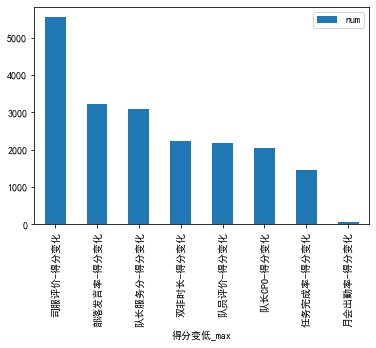

In [92]:
df = stat(driver_ch, 'ch_min', '得分变低_max')
df
# df.to_clipboard()

# 存入excel
ws.append([])
ws.append(['{0}得分变低_max{0}'.format('*'*15)])
ws.append([])
for r in dataframe_to_rows(df, index=True, header=True):
    ws.append(r)

,num,per,per_cum
得分变高_max,,,
双非时长-得分变化,7538,37.95%,37.95%
队员评价-得分变化,4152,20.90%,58.85%
月会出勤率-得分变化,3087,15.54%,74.39%
司服评价-得分变化,2545,12.81%,87.20%
队长CPO-得分变化,1031,5.19%,92.39%
部落发言率-得分变化,931,4.69%,97.08%
任务完成率-得分变化,572,2.88%,99.96%
队长服务分-得分变化,8,0.04%,100.00%


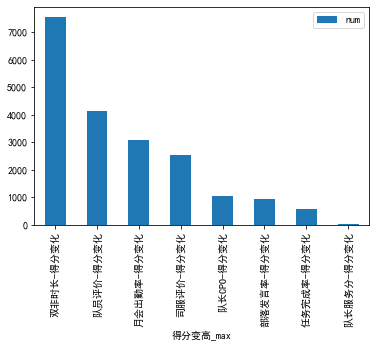

In [93]:
df = stat(driver_ch, 'ch_max', '得分变高_max')
df
# df.to_clipboard()

# 存入excel
ws.append([])
ws.append(['{0}得分变高_max{0}'.format('*'*15)])
ws.append([])
for r in dataframe_to_rows(df, index=True, header=True):
    ws.append(r)

,num,per,per_cum
指标得分变化最大,,,
司服评价-得分变化,4683,23.58%,23.58%
双非时长-得分变化,4658,23.45%,47.02%
队员评价-得分变化,3879,19.53%,66.55%
队长CPO-得分变化,1812,9.12%,75.67%
部落发言率-得分变化,1571,7.91%,83.58%
月会出勤率-得分变化,1299,6.54%,90.12%
任务完成率-得分变化,1217,6.13%,96.25%
队长服务分-得分变化,745,3.75%,100.00%


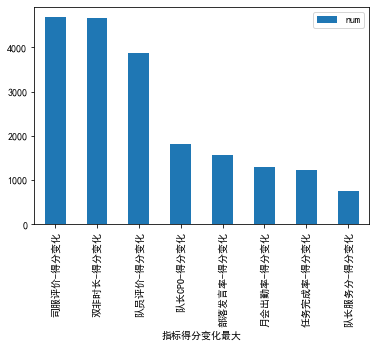

In [94]:
# 取绝对值
df = stat(driver_ch, 'ch_abs', '指标得分变化最大')
df
# df.to_clipboard()

# 存入excel
ws.append([])
ws.append(['{0}指标得分变化最大{0}'.format('*'*15)])
ws.append([])
for r in dataframe_to_rows(df, index=True, header=True):
    ws.append(r)

In [96]:
wb.save('对比.xlsx')

In [97]:
driver_ch.columns

Index(['司机ID', '分类变化2', '分类变化', '最终得分_2', '总评分_1', '总分变化', '月会出勤率-得分变化',
       '部落发言率-得分变化', '任务完成率-得分变化', '队长服务分-得分变化', '队长CPO-得分变化', '双非时长-得分变化',
       '队员评价-得分变化', '司服评价-得分变化', 'ch_max', 'ch_min', 'ch_abs'],
      dtype='object')

In [98]:
lt_t0 = list(map(lambda x: x.split('-')[0], lt_t))
lt_t0
lt_t2 = list(map(lambda x: x+'%', lt_t))
lt_t2

['月会出勤率', '部落发言率', '任务完成率', '队长服务分', '队长CPO', '双非时长', '队员评价', '司服评价']

['月会出勤率-得分变化%',
 '部落发言率-得分变化%',
 '任务完成率-得分变化%',
 '队长服务分-得分变化%',
 '队长CPO-得分变化%',
 '双非时长-得分变化%',
 '队员评价-得分变化%',
 '司服评价-得分变化%']

In [58]:
driver_ch.columns

Index(['司机ID', '分类变化2', '分类变化', '最终得分_2', '总评分_1', '总分变化', '月会出勤率-得分变化',
       '部落发言率-得分变化', '任务完成率-得分变化', '队长服务分-得分变化', '队长CPO-得分变化', '双非时长-得分变化',
       '队员评价-得分变化', '司服评价-得分变化', 'ch_max', 'ch_min', 'ch_abs'],
      dtype='object')

In [59]:
'''
def target_ch_per(tar, tar_raw):
    global driver_ch
    try:
        # driver_ch[tar] = driver_ch.apply(lambda x: x[tar_raw] / x['总分变化'])  # 出错x[tar_raw]
        driver_ch[tar] = driver_ch.apply(lambda x: x.get(tar_raw) / x.get('总分变化'))   # 可能存在数据为NAN，跳过
    except:
        print(tar)
    return None

driver_ch.to_clipboard()

for i in range(len(lt_t)):
    target_ch_per(lt_t2[i], lt_t[i])
driver_ch.head()
'''

"\ndef target_ch_per(tar, tar_raw):\n    global driver_ch\n    try:\n        # driver_ch[tar] = driver_ch.apply(lambda x: x[tar_raw] / x['总分变化'])  # 出错x[tar_raw]\n        driver_ch[tar] = driver_ch.apply(lambda x: x.get(tar_raw) / x.get('总分变化'))   # 可能存在数据为NAN，跳过\n    except:\n        print(tar)\n    return None\n\ndriver_ch.to_clipboard()\n\nfor i in range(len(lt_t)):\n    target_ch_per(lt_t2[i], lt_t[i])\ndriver_ch.head()\n"

In [99]:
lt_t

['月会出勤率-得分变化',
 '部落发言率-得分变化',
 '任务完成率-得分变化',
 '队长服务分-得分变化',
 '队长CPO-得分变化',
 '双非时长-得分变化',
 '队员评价-得分变化',
 '司服评价-得分变化']

In [61]:
lt

NameError: name 'lt' is not defined

In [103]:
lt = []
for i in range(len(lt_t)):
    lt.append(driver_ch[lt_t[i]].mean())
stat_tar = pd.DataFrame({'变动分数_avg': lt}, index=lt_t0)
stat_tar['变动分数_abs'] = stat_tar['变动分数_avg'].apply(lambda x: abs(x))
num = stat_tar['变动分数_abs'].sum()
stat_tar['变动百分比'] = stat_tar.apply(lambda x: x['变动分数_avg'] / num, axis=1)
stat_tar


# 存入excel
ws.append([])
ws.append(['{0}变动分数统计{0}'.format('*'*15)])
ws.append([])
for r in dataframe_to_rows(stat_tar, index=True, header=True):
    ws.append(r)

,变动分数_avg,变动分数_abs,变动百分比
月会出勤率,0.657017,0.657017,0.101699
部落发言率,-1.266864,1.266864,-0.196097
任务完成率,-0.569571,0.569571,-0.088163
队长服务分,-1.315646,1.315646,-0.203647
队长CPO,-0.542555,0.542555,-0.083982
双非时长,0.613594,0.613594,0.094978
队员评价,0.292224,0.292224,0.045233
司服评价,-1.202938,1.202938,-0.186202


In [104]:
wb.save('对比.xlsx')